# OQPSK


נראה כאן את הדברים שדיברנו עליהם מקודם, נריץ כמה סימולציות
כדי לראות את ההבדלים בין QPSK ובין OQPSK

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft

In [81]:
def get_constellation_plot():
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8, 8))
    ax.text(0, ax.get_ylim()[1] * 1.2, '$I$', ha='center', va='center', fontsize=12)
    # ylabel at the top (angle = pi/2, radius = max_radius)
    ax.text(np.pi / 2, ax.get_ylim()[1] * 1.2, '$Q$', ha='center', va='center', fontsize=12)
    ax.set_rlabel_position(80)
    return fig, ax

## Parameters

In [104]:
N = 1000
M = 4
fs = 50000 # sampling frequency
T = 1/fs
time = np.arange(N)/fs
n_bit = 10
n_sym = int(n_bit*np.log2(M))

## modulate the signals

In [98]:
# generate random bits
bits = np.random.randint(0, 2, int(N*np.log2(M)))
# QPSK
QPSK_symbols_num = np.dot(bits.reshape(-1,2), [2,1]) # 0, 1, 2, 3
QPSK = np.exp(1j*(np.pi/2*QPSK_symbols_num+np.pi/4))
QPSK = np.repeat(QPSK, n_sym) # make it one sample per T_bit and not T_S

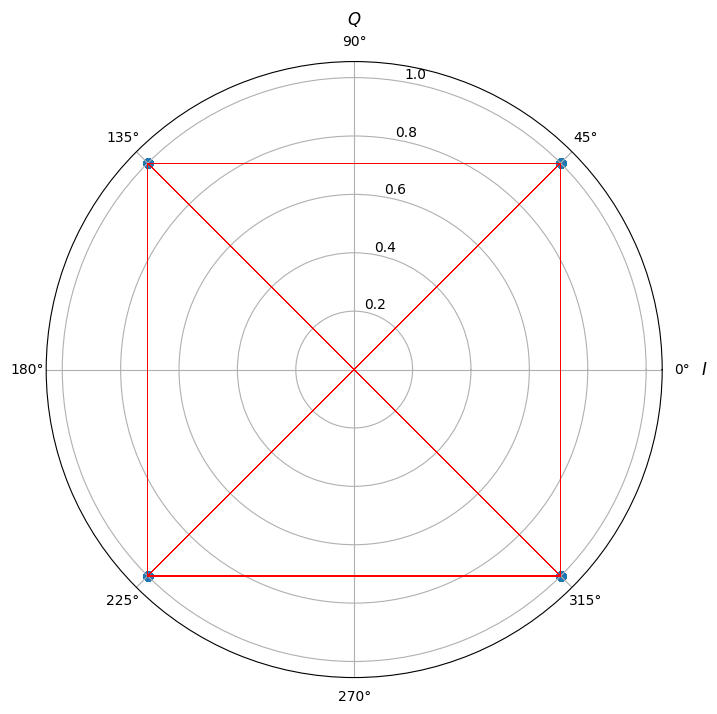

In [116]:
fig,ax = get_constellation_plot()
ax.scatter(np.angle(QPSK),np.abs(QPSK))
# plot transitions
ax.plot(np.angle(QPSK),np.abs(QPSK), 'r',lw=0.1)

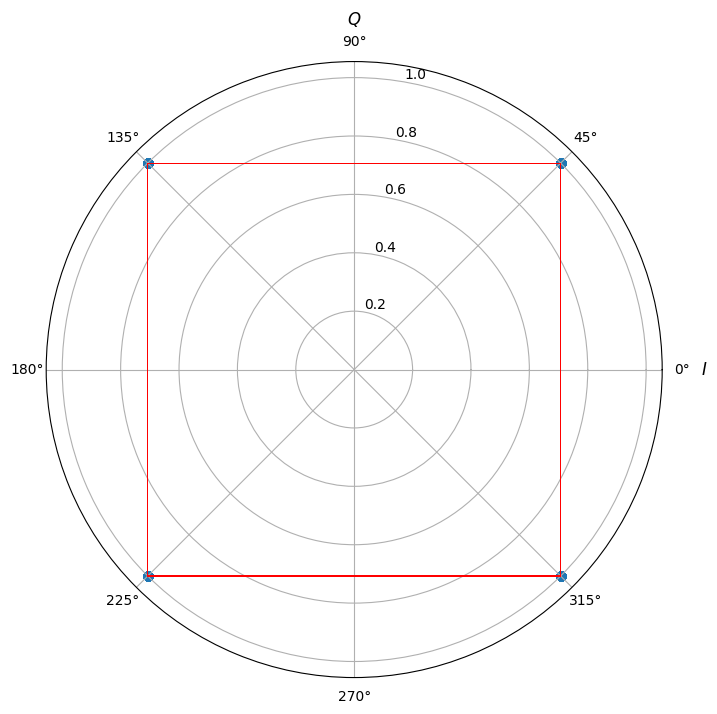

In [117]:
fig,ax = get_constellation_plot()
# OQPSK
OQPSK = QPSK.real + 1j*np.roll(QPSK.imag, -n_sym//2)
ax.scatter(np.angle(OQPSK),np.abs(OQPSK))
# plot transitions
ax.plot(np.angle(OQPSK),np.abs(OQPSK),lw=0.1, color='r')

## plot psd for QPSK and OQPSK

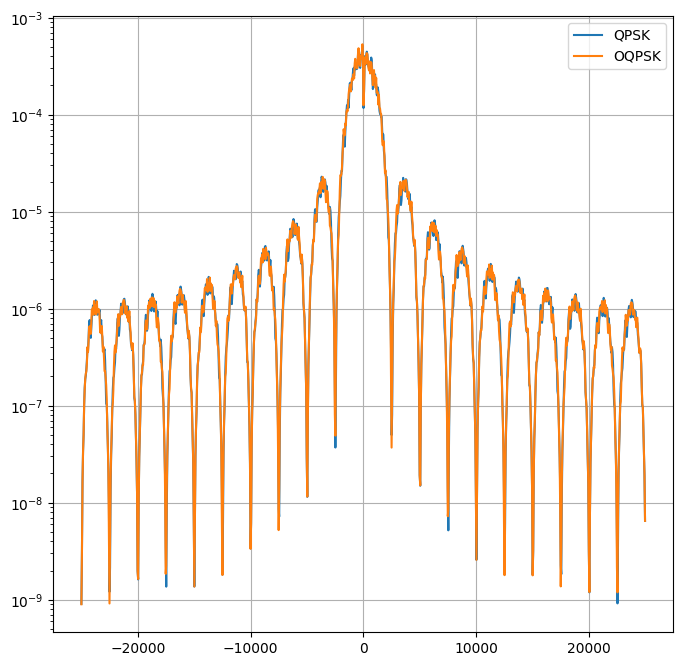

In [115]:
f, Pxx_QPSK = signal.welch(QPSK, fs, nperseg=1024, return_onesided=False)
f, Pxx_OQPSK = signal.welch(OQPSK, fs, nperseg=1024, return_onesided=False)
f = fft.fftshift(f)
Pxx_QPSK = fft.fftshift(Pxx_QPSK)
Pxx_OQPSK = fft.fftshift(Pxx_OQPSK)
plt.figure(figsize=(8,8))
plt.semilogy(f, Pxx_QPSK, label='QPSK')
plt.semilogy(f, Pxx_OQPSK, label='OQPSK')
plt.legend()
plt.grid()
plt.show()